### CM3400 Sample Solutions for Worksheet 08
Clustering using Python for CM3400 Intrioduction to Data Science with Python

In [206]:
import pandas as pd
import seaborn
import numpy as np
import matplotlib.pyplot as plt

### Task 1 - Clustering the numerical values in the iris dataset

In [207]:
### Use seaborn data as an example.
iris = seaborn.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [208]:
## Imagine however we did not know the species. 
## Would clustering identify that there were different flower types?
## remove the species column, but keep a copy for comparing to clusters later 

species = iris["species"]

## remove the species column 
iris = iris.drop(columns = "species")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<AxesSubplot:>

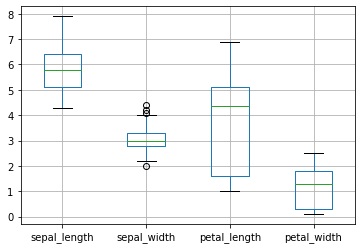

In [209]:
iris.boxplot()

In [210]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
iris_norm = pd.DataFrame(scaler.fit_transform(iris), columns = iris.columns)

In [211]:
## load the function we need to to KMeans clustering
from sklearn.cluster import KMeans

## We have to select the number of clusters to form. (we suspect this is 3, as there are 3 flower species in iris)
kmeans = KMeans(n_clusters = 3)

# pick the data either iris or iris_norm, try both and see if there is a difference
df = iris
df = iris_norm

## fit the model
clusters = kmeans.fit(df)

## get the vector of cluster labels it has assigned (note that this comes as an np.array)
cluster_labels = clusters.predict(df)

## storing as a DataFrame makes it a more failiar object which to count and plot
labels = pd.DataFrame(cluster_labels)
print("clustering shows following number in each cluster")
labels.value_counts()

clustering shows following number in each cluster


2    53
1    50
0    47
dtype: int64

We can visualise the clusters in a variety of ways

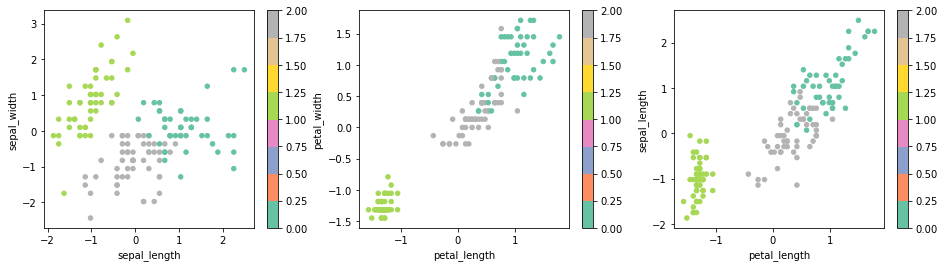

In [212]:
## Can visualise by selecting two variables and color coding a scatterplot of them by the cluster label 
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
## see https://matplotlib.org/stable/gallery/color/colormap_reference.html for a list of color maps
df.plot.scatter(x = 'sepal_length', y = 'sepal_width', c = cluster_labels, cmap = 'Set2', ax = ax[0])
df.plot.scatter(x = 'petal_length', y = 'petal_width', c = cluster_labels, cmap = 'Set2', ax = ax[1])
df.plot.scatter(x = 'petal_length', y = 'sepal_length', c = cluster_labels, cmap = 'Set2', ax = ax[2])
plt.show()

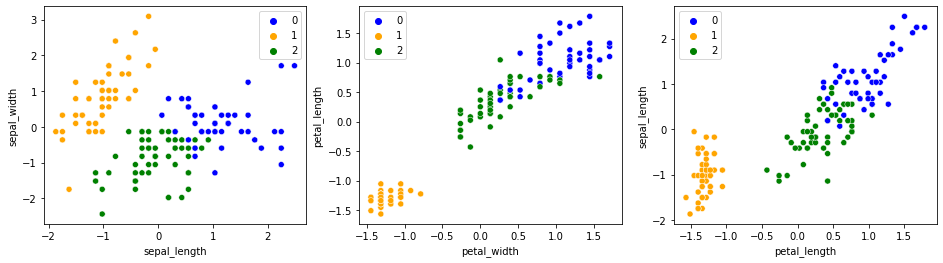

In [213]:
## But seaborn scatterplot is still nicer I think, 
## set hue parameter to the cluster_labels, an we can easily pick our own colours using the pallete parameter
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
seaborn.scatterplot(x = 'sepal_length', y = 'sepal_width', data = df, 
                    hue = cluster_labels, palette = ['blue','orange','green'], ax = ax[0])
seaborn.scatterplot(x = 'petal_width', y = 'petal_length', data = df, 
                    hue = cluster_labels, palette = ['blue','orange','green'], ax = ax[1])
seaborn.scatterplot(x = 'petal_length', y = 'sepal_length', data = df, 
                    hue = cluster_labels, palette = ['blue','orange','green'], ax = ax[2])
plt.show()

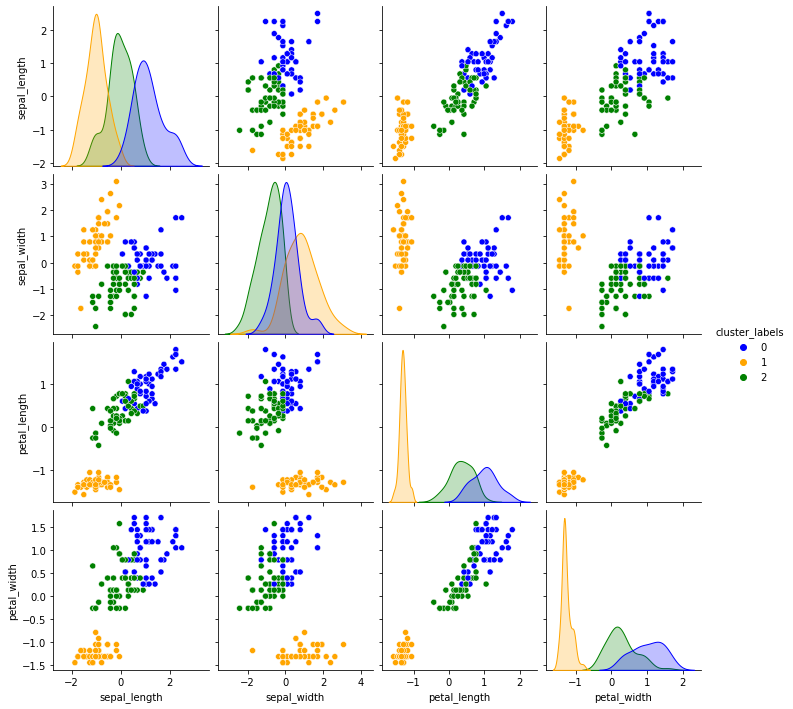

In [214]:
## Perhaps even better is a pairplot, colour coded by cluster labels, 
## but for that we need to add a column to the data frame as hue parameter 
## must used a colun fom same data frame as the plotted variables
df2 = df.copy()
df2['cluster_labels'] = cluster_labels
seaborn.pairplot(df2, hue = 'cluster_labels', palette = ['blue','orange','green'])

In [215]:
## lets compare the clusters to the original species calculation
print("clustering clearly ientifies the setosa  subspecies as a cluster")
print("in the plots above there is a clear gap in properties, and in crosstab unambiguous 'classification'")
print("differentiation between other two is less clear at boundary, with overlap of properties")
print("and hence imperfect 'classification'")
pd.crosstab(species, cluster_labels)

clustering clearly ientifies the setosa  subspecies as a cluster
in the plots above there is a clear gap in properties, and in crosstab unambiguous 'classification'
differentiation between other two is less clear at boundary, with overlap of properties
and hence imperfect 'classification'


col_0,0,1,2
species,,,
setosa,0,50,0
versicolor,11,0,39
virginica,36,0,14


(c) Use the following code to explore the effect of cluster size on the inertia measure of within
cluster sum of squared distances (which is a measure of clustering effectiveness)


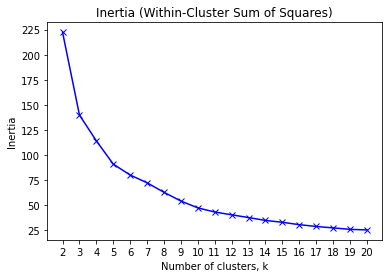

Sharpest curvature probably at k=3 (as we might expect since we know there are three species)
But k=4 


In [216]:
## To investigate different numbers of clusters plot inertia (the within cluster sum of square distances)

from sklearn.metrics import silhouette_samples, silhouette_score
inertias = []
K = range(2, 21)
 
for k in K:
    clusterer = KMeans(n_clusters=k)
    clusters = clusterer.fit(df)
    cluster_labels = clusters.predict(df)    
    inertias.append(clusterer.inertia_)

## Then plot the elbow curve
plt.plot(K, inertias, 'bx-')
plt.xticks(K)
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Inertia (Within-Cluster Sum of Squares)')
plt.show()

print("Sharpest curvature probably at k=3 (as we might expect since we know there are three species)")
print("But k=4 ")

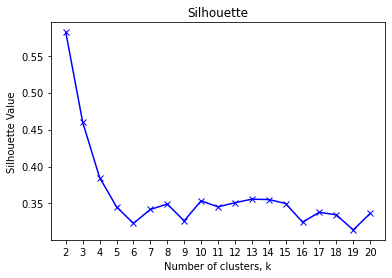

Here, w see that k=3 is best choice for number of clusters.
Remember that higher silhouette values are better, and measure cohesion inside clusters, separation between clusters


In [217]:
## We could also investigate the average silhouette values (a measure of cohesion and separation)

from sklearn.metrics import silhouette_samples, silhouette_score
silhouette = []
K = range(2, 21)
 
for k in K:
    clusterer = KMeans(n_clusters=k)
    clusters = clusterer.fit(df)
    cluster_labels = clusters.predict(df)
    
    avg_score = silhouette_score(df, labels = cluster_labels)
    silhouette.append(avg_score)

## Then plot the averge silhouette scores against cluster size
plt.plot(K, silhouette, 'bx-')
plt.xticks(K)
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Value')
plt.title('Silhouette')
plt.show()
print("Here, w see that k=3 is best choice for number of clusters.")
print("Remember that higher silhouette values are better, and measure cohesion inside clusters, separation between clusters")

(d) Now use the AgglomerativeClustering function from sklearn.clustering to perform a
another clustering for this dataset.

In [218]:
from sklearn.cluster import AgglomerativeClustering

aggcluster = AgglomerativeClustering(n_clusters = 3)


aggModel = aggcluster.fit(df)

cluster_labels = aggModel.labels_

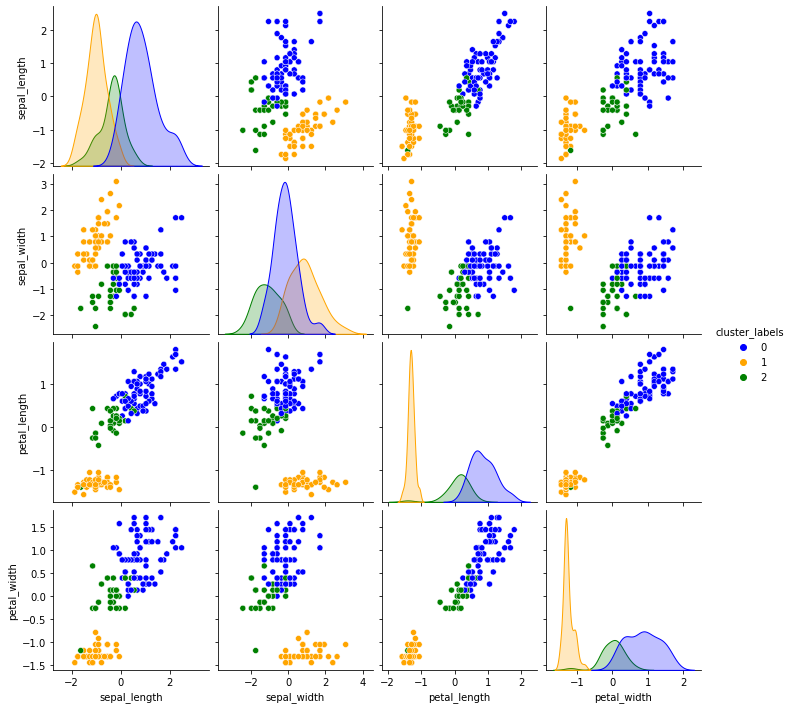

In [219]:
df3 = df.copy()
df3['cluster_labels'] = aggModel.labels_
seaborn.pairplot(df3, hue = 'cluster_labels', palette = ['blue','orange','green'])

In [220]:
## lets compare the clusters from the hierarchical clustering to the original species calculation
print("similar performance to the kMeans clustering")
pd.crosstab(species, aggModel.labels_)

similar performance to the kMeans clustering


col_0,0,1,2
species,,,
setosa,0,49,1
versicolor,23,0,27
virginica,48,0,2


(e) To create a dendrogram, some code was adapted from
https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

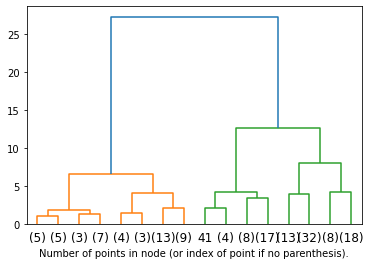

In [221]:
from scipy.cluster.hierarchy import dendrogram

aggcluster2 = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

aggModel2 = aggcluster2.fit(df)

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


plot_dendrogram(aggModel2, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### Task 2 - Clustering the numerical values in the iris dataset

In [222]:
insur = pd.read_csv("C:/Data/insurance.csv")#, index_col = 0)
insur.head()


,age,gender,bmi,children,smoker,city,cost
0,19,female,27.900,0,yes,Aberdeen,17330.99
1,18,male,33.770,1,no,Glasgow,1892.99
2,28,male,33.000,3,no,Glasgow,4680.12
3,33,male,22.705,0,no,Dundee,22345.30
4,32,male,28.880,0,no,Dundee,4235.46


In [223]:
## If including all variables we need to one-hot encode the categorical data, make a one-hot encoded copy
insur_OHE = pd.get_dummies(insur)

In [224]:
##We should scale the numerical variable (since e.g. cost ranges 0-75000, whereas children 0-5
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
insur_OHE['children'] = scaler.fit_transform(insur[['children']])
insur_OHE['bmi'] = scaler.fit_transform(insur[['bmi']])
insur_OHE['age'] = scaler.fit_transform(insur[['age']])
insur_OHE['cost'] = scaler.fit_transform(insur[['cost']])

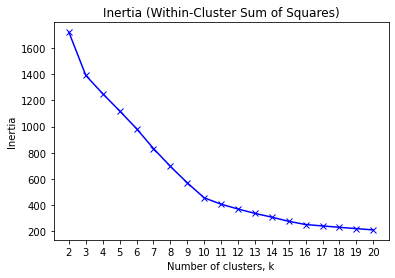

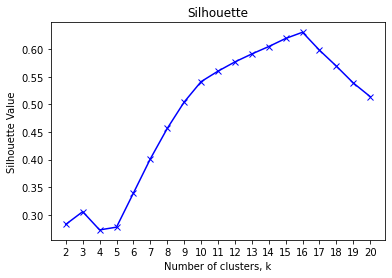

In [225]:
## To investigate different numbers of clusters plot inertia (the within cluster sum of square distances)

from sklearn.metrics import silhouette_samples, silhouette_score
inertias = []
silhouette = []
K = range(2, 21)
 
for k in K:
    clusterer = KMeans(n_clusters=k)
    clusters = clusterer.fit(insur_OHE)
    labels = clusters.predict(insur_OHE)
    
    inertias.append(clusterer.inertia_)
    avg_score = silhouette_score(insur_OHE, labels = labels)
    silhouette.append(avg_score)

## Then plot the elbow curve
plt.plot(K, inertias, 'bx-')
plt.xticks(K)
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Inertia (Within-Cluster Sum of Squares)')
plt.show()

## Then plot the averge silhouette scores against cluster size
plt.plot(K, silhouette, 'bx-')
plt.xticks(K)
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Value')
plt.title('Silhouette')
plt.show()

Elbow curve might suggest k=10, silhouette peaks at k=16
But it's probably just picking out the combinations of the categorical variables

In [226]:
from sklearn.cluster import KMeans

## We have to select the number of clusters to form. Try with k = 10
kmeans = KMeans(n_clusters = 10)
## fit the model
clusters = kmeans.fit(insur_OHE)
## get the vector of cluster labels it has assigned
insur_clusters = clusters.predict(insur_OHE)

In [227]:
### Add cluster labels to copy of original data
insur_clustered = insur.assign(label = insur_clusters)
insur_clustered.head()

,age,gender,bmi,children,smoker,city,cost,label
0,19,female,27.900,0,yes,Aberdeen,17330.99,9
1,18,male,33.770,1,no,Glasgow,1892.99,6
2,28,male,33.000,3,no,Glasgow,4680.12,6
3,33,male,22.705,0,no,Dundee,22345.30,8
4,32,male,28.880,0,no,Dundee,4235.46,8


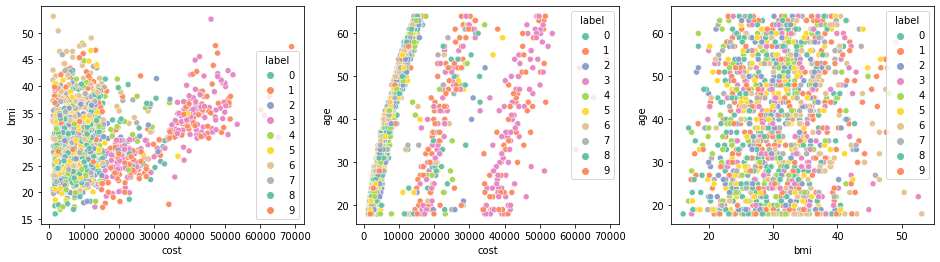

In [228]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
seaborn.scatterplot(x = 'cost', y = 'bmi', data = insur_clustered, 
                    hue = 'label', palette = 'Set2', ax = ax[0])
seaborn.scatterplot(x = 'cost', y = 'age', data = insur_clustered, 
                    hue = 'label', palette = 'Set2', ax = ax[1])
seaborn.scatterplot(x = 'bmi', y = 'age', data = insur_clustered, 
                    hue = 'label', palette = 'Set2', ax = ax[2])
plt.show()

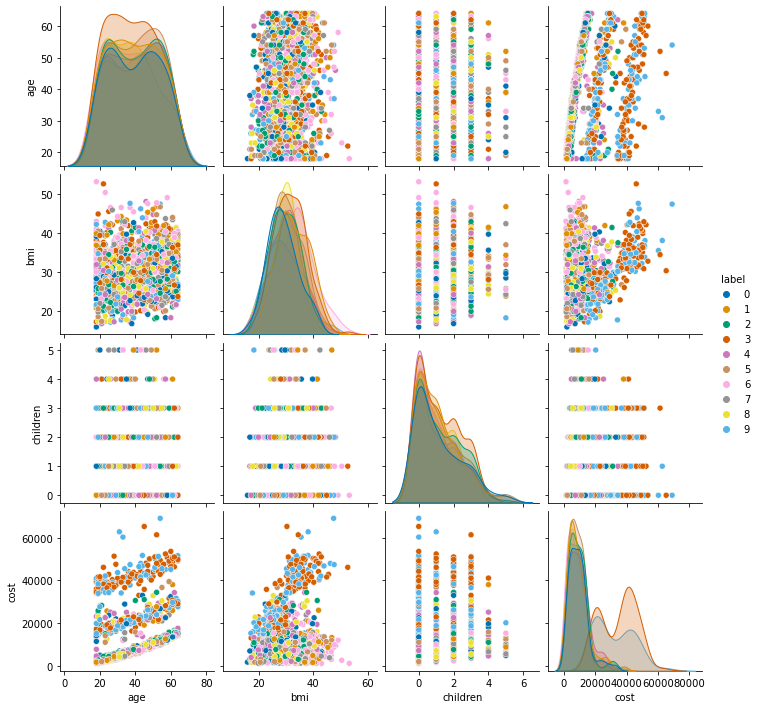

In [229]:
seaborn.pairplot(insur_clustered, hue = 'label', palette = 'colorblind')

Nothing very clear there! But as expected in the categories below we see where the clusters are based on.

In [230]:
## (c) crosstabs to examine potential links to cluster value and categorical variables
pd.crosstab(insur_clustered['city'], insur_clustered['label'])

label,0,1,2,3,4,5,6,7,8,9
city,,,,,,,,,,
Aberdeen,0,0,0,37,0,141,0,126,0,21
Dundee,0,0,135,29,0,0,0,0,132,29
Edinburgh,125,0,0,38,132,0,0,0,0,29
Glasgow,0,139,0,55,0,0,134,0,0,36


In [231]:
pd.crosstab(insur_clustered['smoker'], insur_clustered['label'])

label,0,1,2,3,4,5,6,7,8,9
smoker,,,,,,,,,,
no,125,139,135,0,132,141,134,126,132,0
yes,0,0,0,159,0,0,0,0,0,115


In [232]:
pd.crosstab(insur_clustered['gender'], insur_clustered['label'])

label,0,1,2,3,4,5,6,7,8,9
gender,,,,,,,,,,
female,0,139,135,0,132,141,0,0,0,115
male,125,0,0,159,0,0,134,126,132,0


In [233]:
## We'll also remove the categorical variables and just cluster using the numerical values
## smoker and gender categories are binary so will tend to differentiate

## We need to one-hot encode the categorical data, make a one-hot encoded copy
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

In [234]:
insur_NORM = pd.DataFrame(scaler.fit_transform(insur[['age','bmi','children','cost']]))
insur_NORM.head()

,0,1,2,3
0,0.021739,0.321227,0.0,0.238281
1,0.000000,0.479150,0.2,0.010768
2,0.217391,0.458434,0.6,0.051843
3,0.326087,0.181464,0.0,0.312179
4,0.304348,0.347592,0.0,0.045289


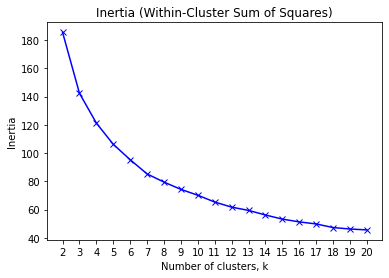

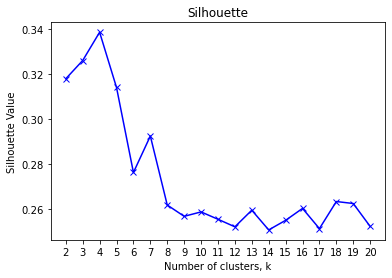

In [235]:
from sklearn.metrics import silhouette_samples, silhouette_score
inertias = []
silhouette = []
K = range(2, 21)
 
for k in K:
    clusterer = KMeans(n_clusters=k)
    clusters = clusterer.fit(insur_NORM)
    labels = clusters.predict(insur_NORM)
    
    inertias.append(clusterer.inertia_)
    avg_score = silhouette_score(insur_NORM, labels = labels)
    silhouette.append(avg_score)

## Then plot the elbow curve
plt.plot(K, inertias, 'bx-')
plt.xticks(K)
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Inertia (Within-Cluster Sum of Squares)')
plt.show()

## Then plot the averge silhouette scores against cluster size
plt.plot(K, silhouette, 'bx-')
plt.xticks(K)
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Value')
plt.title('Silhouette')
plt.show()

In [236]:
from sklearn.cluster import KMeans

## We have to select the number of clusters to form. k = 4  or k=7 from elbow maybe, but k=4 has highest silhouette value 
kmeans = KMeans(n_clusters = 4)
## fit the model
clusters_norm = kmeans.fit(insur_OHE_NORM)
## get the vector of cluster labels it has assigned
insur_clusters_norm = clusters_norm.predict(insur_OHE_NORM)

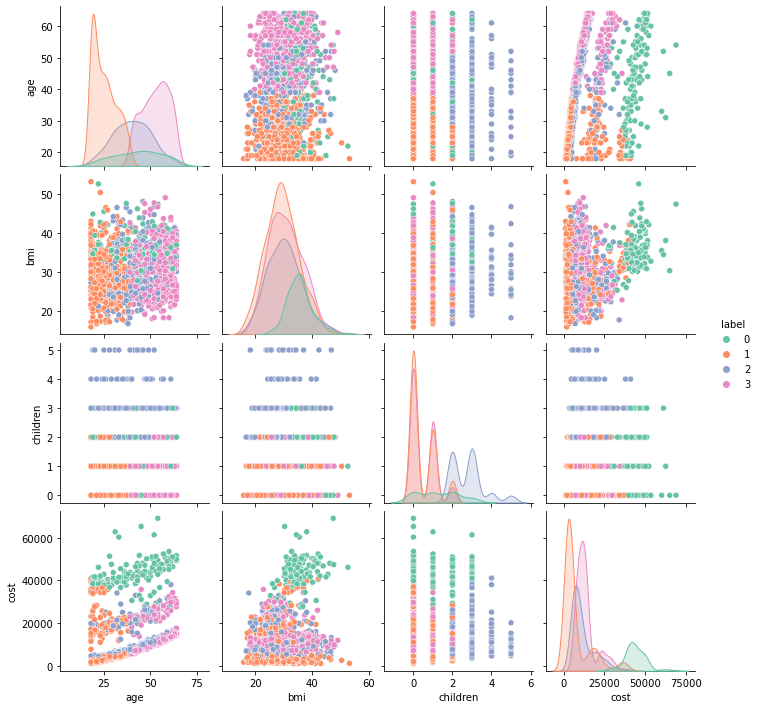

In [237]:
### Add cluster labels to copy of original data
insur_clustered_norm = insur.assign(label = insur_clusters_norm)
seaborn.pairplot(insur_clustered_norm, hue = 'label', palette = 'Set2')

In [238]:
## (c) crosstabs to examine potential links to cluster value and categorical variables
pd.crosstab(insur_clustered_norm['city'], insur_clustered_norm['label'], normalize = 'columns')

label,0,1,2,3
city,,,,
Aberdeen,0.219697,0.226496,0.257143,0.257683
Dundee,0.181818,0.254274,0.273016,0.226950
Edinburgh,0.204545,0.241453,0.228571,0.264775
Glasgow,0.393939,0.277778,0.241270,0.250591


In [239]:
pd.crosstab(insur_clustered_norm['smoker'], insur_clustered_norm['label'], normalize = 'columns')

label,0,1,2,3
smoker,,,,
no,0.083333,0.850427,0.863492,0.905437
yes,0.916667,0.149573,0.136508,0.094563


In [240]:
pd.crosstab(insur_clustered_norm['gender'], insur_clustered_norm['label'], normalize = 'columns')

label,0,1,2,3
gender,,,,
female,0.371212,0.512821,0.485714,0.520095
male,0.628788,0.487179,0.514286,0.479905


clustering does not always show clear results. Perhaps clearest aspect here is that when k=4 or more, one cluster certainly seems to pick out a cluster of high-cost smokers, and clusters above and below 50 in age

In [253]:
from sklearn.cluster import AgglomerativeClustering
aggcluster = AgglomerativeClustering(n_clusters = 4)

aggModelInsur = aggcluster.fit(insur_NORM)

cluster_labels_insur = aggModelInsur.labels_

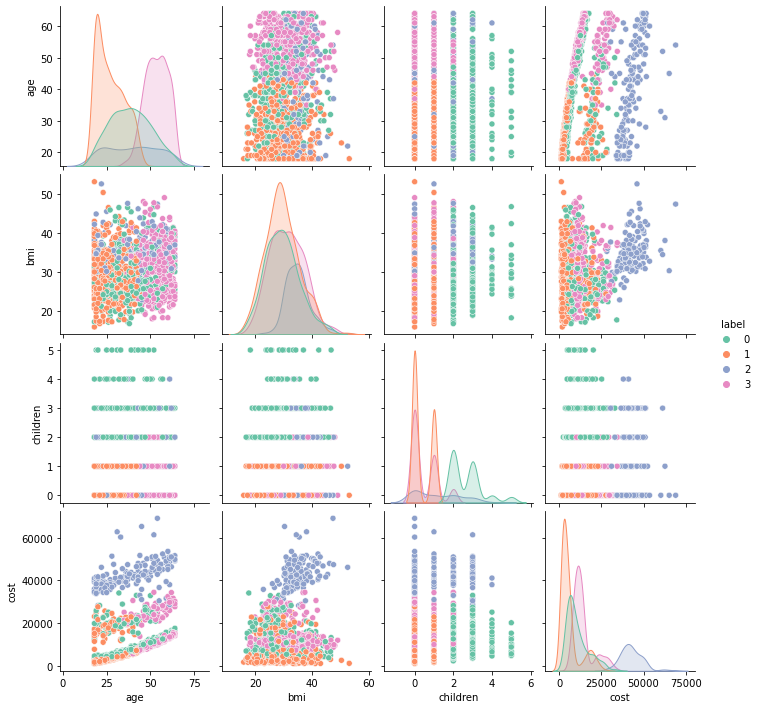

In [254]:
### Add cluster labels to copy of original data
insur_clustered_agg = insur.assign(label = cluster_labels_insur)
seaborn.pairplot(insur_clustered_agg, hue = 'label', palette = 'Set2')

In [255]:
pd.crosstab(insur_clustered_agg['smoker'], insur_clustered_agg['label'], normalize = 'columns')

label,0,1,2,3
smoker,,,,
no,0.877907,0.894855,0.056604,0.909794
yes,0.122093,0.105145,0.943396,0.090206


In [256]:
pd.crosstab(insur_clustered_agg['gender'], insur_clustered_agg['label'], normalize = 'columns')

label,0,1,2,3
gender,,,,
female,0.497093,0.521253,0.36478,0.515464
male,0.502907,0.478747,0.63522,0.484536


In [257]:
pd.crosstab(insur_clustered_agg['children'], insur_clustered_agg['label'], normalize = 'columns')

label,0,1,2,3
children,,,,
0,0.000000,0.619687,0.396226,0.603093
1,0.000000,0.380313,0.213836,0.309278
2,0.494186,0.000000,0.226415,0.087629
3,0.386628,0.000000,0.150943,0.000000
4,0.066860,0.000000,0.012579,0.000000
5,0.052326,0.000000,0.000000,0.000000


Hirarchical method gives a clearer interpretation
With 4 clusters might interpret groups as:
* Large family size
* Under 50, non-smoker
* High-cost, smokers
* Over 50's, non smokers